In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout
from matplotlib import pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Read data
df = pd.read_csv('data.csv')
# 쓸데없는 index 제거
df = df.drop(df.columns[0], axis=1)
#print(df.head())

train_hours = pd.to_datetime(df['_time'])
#print(train_hours.tail(15))

# moduleName = cosmos만 고르기
cosmos_df = df[df['chainName'] == "cosmos"]
#columns_to_keep = ['_time', 'cap', 'high24h', 'low24h', 'price','totalVolume', 'apr', 'bondedTokens', 'communityTokens', 'tps', 'priceBTC', 'Binance #01 (Deposit)-amountValue', 'Binance #02 (Deposit)-amountValue', 'Binance #03 (Withdraw)-amountValue', 'Binance #04 (Staking)-amountValue', 'Bitforex #01 (Deposit)-amountValue', 'Bithumb #02 (Withdraw)-amountValue', 'Bithumb #03-amountValue', 'Bithumb #05-amountValue', 'Coinbase #01-amountValue', 'Coinbase #03-amountValue', 'Coinbase #05-amountValue', 'Coinbase #06-amountValue', 'Coinbase #08-amountValue', 'Coinone #01(Deposit)-amountValue', 'Digfinex #01 (Deposit)-amountValue', 'DokiaCapital #01 (Validator)-amountValue', 'DokiaCapital #02 (Validator)-amountValue', 'HitBTC #02-amountValue', 'Ignite-amountValue', 'Interchain Foundation #01-amountValue', 'Interchain Foundation #02-amountValue', 'Kraken #01-amountValue', 'MEXC #01 (Deposit)-amountValue', 'OKK #01-amountValue', 'Upbit #01 (Deposit)-amountValue', 'Upbit #02 (Withdraw)-amountValue', 'Upbit #10 (Validator)-amountValue', 'Upbit #11 (Staking)-amountValue', 'Upbit #12 (Staking)-amountValue', 'Upbit #13 (Staking)-amountValue', 'Upbit #14 (Staking)-amountValue', 'Upbit #15 (Staking)-amountValue', 'Upbit #16 (Staking)-amountValue', 'Upbit #17 (Staking)-amountValue', 'Upbit #18 (Staking)-amountValue', 'Upbit #19 (Staking)-amountValue', 'Upbit #20 (Staking)-amountValue', 'bonded_tokens_pool-amountValue', 'distribution-amountValue', 'fee_collector-amountValue', 'gov-amountValue', 'not_bonded_tokens_pool-amountValue']
cosmos_df = cosmos_df.drop(columns=['chainName', 'ath', 'athDate', 'atl', 'atlDate', 'JUNO ATOM Pool-amountValue', 'JUNO NETA Pool-amountValue', 'JUNO OSMO Pool-amountValue',	'JUNO RAW Pool-amountValue',	'JUNO ATOM Pool-boxplot',	'JUNO NETA Pool-boxplot',	'JUNO OSMO Pool-boxplot',	'JUNO RAW Pool-boxplot'])
print(cosmos_df.shape)
# (2446, 5)

(2446, 111)


(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1944, 12, 30).
trainY shape == (1944, 1).
testX shape == (490, 12, 30).
testY shape == (490, 1).


(1944, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 8)             1248      
                                                                 
 dropout_2 (Dropout)         (None, 12, 8)             0         
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1801 (7.04 KB)
Trainable params: 1801 (7.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100


INFO:tensorflow:Assets written to: ./models/LSTM_A0_2_8_12/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
61/61 [==============================] - 0s 989us/step


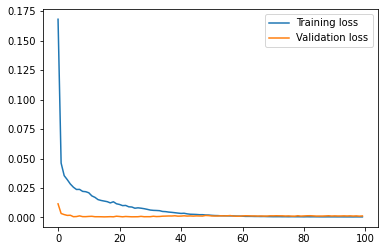

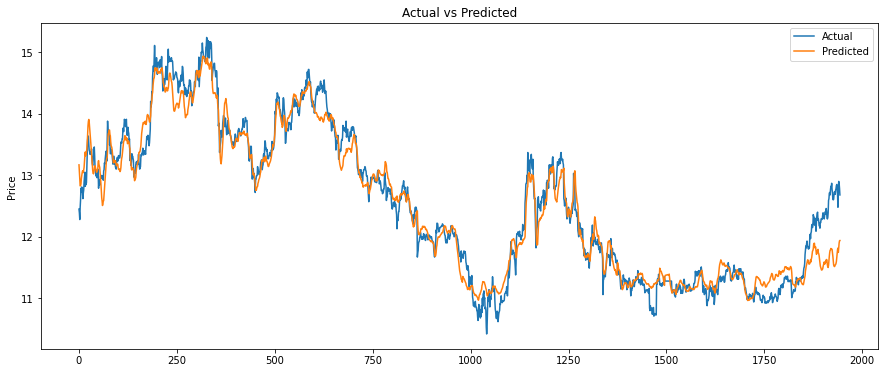

Train Score: 0.27 RMSE, 0.07 MSE, 0.20 MAE
16/16 [==============================] - 0s 3ms/step


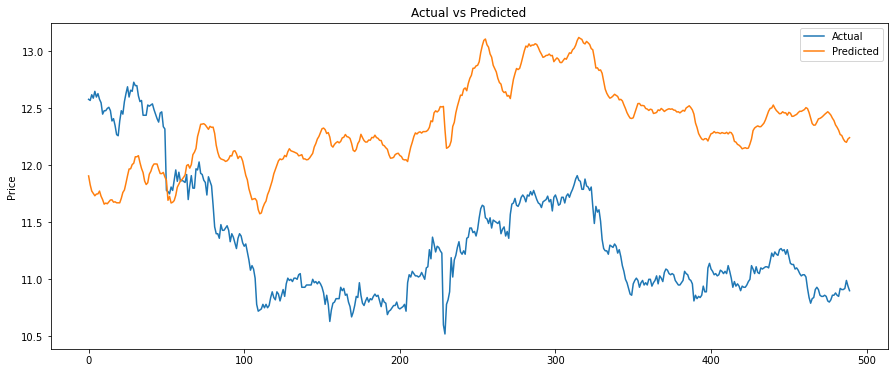

Test Score: 1.21 RMSE, 1.45 MSE, 1.15 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1932, 24, 30).
trainY shape == (1932, 1).
testX shape == (490, 24, 30).
testY shape == (490, 1).


(1932, 1)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 24, 8)             1248      
                                                                 
 dropout_4 (Dropout)         (None, 24, 8)             0         
                                                                 
 lstm_5 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1801 (7.04 KB)
Trainable params: 1801 (7.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100


INFO:tensorflow:Assets written to: ./models/LSTM_A0_2_8_24/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
61/61 [==============================] - 0s 1ms/step


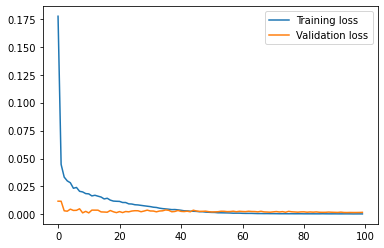

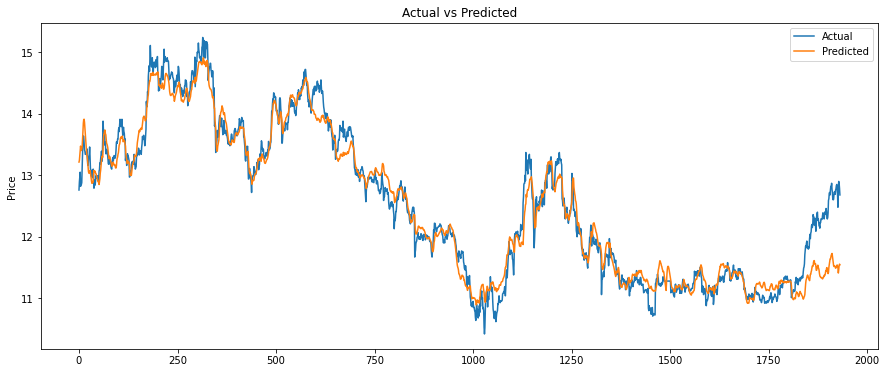

Train Score: 0.28 RMSE, 0.08 MSE, 0.19 MAE
16/16 [==============================] - 0s 2ms/step


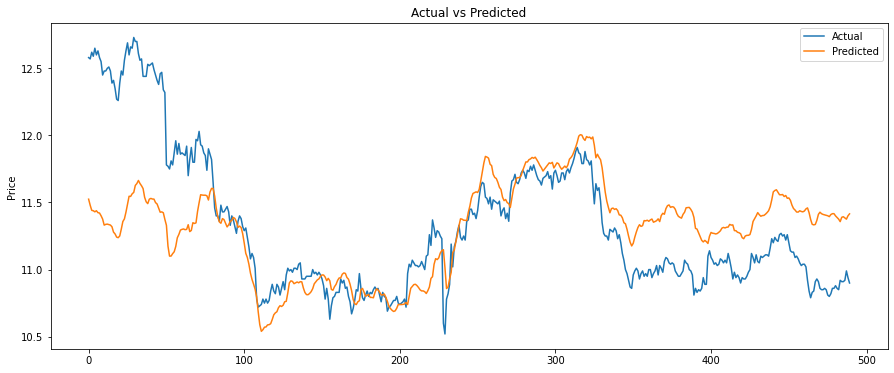

Test Score: 0.44 RMSE, 0.19 MSE, 0.32 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1920, 36, 30).
trainY shape == (1920, 1).
testX shape == (490, 36, 30).
testY shape == (490, 1).


(1920, 1)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 36, 8)             1248      
                                                                 
 dropout_6 (Dropout)         (None, 36, 8)             0         
                                                                 
 lstm_7 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_7 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1801 (7.04 KB)
Trainable params: 1801 (7.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100


INFO:tensorflow:Assets written to: ./models/LSTM_A0_2_8_36/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
60/60 [==============================] - 0s 2ms/step


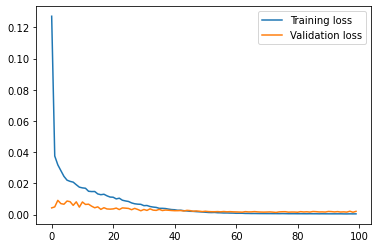

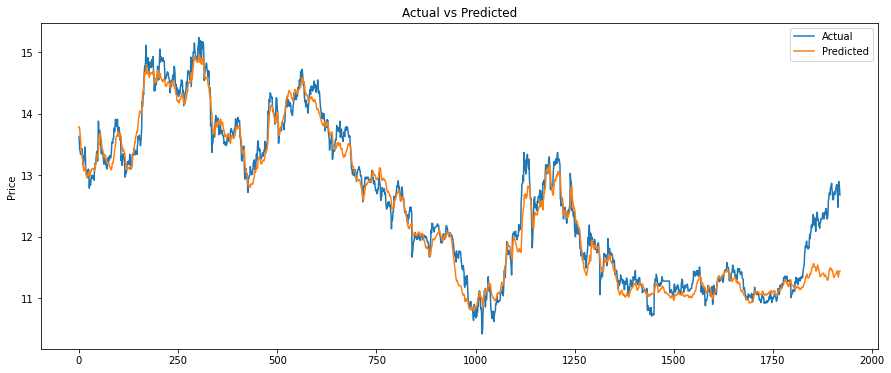

Train Score: 0.28 RMSE, 0.08 MSE, 0.18 MAE
16/16 [==============================] - 0s 2ms/step


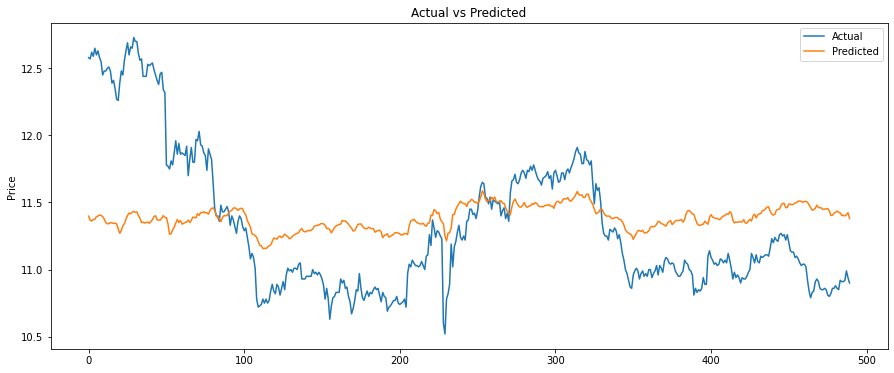

Test Score: 0.50 RMSE, 0.25 MSE, 0.41 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1908, 48, 30).
trainY shape == (1908, 1).
testX shape == (490, 48, 30).
testY shape == (490, 1).


(1908, 1)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 48, 8)             1248      
                                                                 
 dropout_8 (Dropout)         (None, 48, 8)             0         
                                                                 
 lstm_9 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_9 (Dropout)         (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1801 (7.04 KB)
Trainable params: 1801 (7.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100


INFO:tensorflow:Assets written to: ./models/LSTM_A0_2_8_48/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
60/60 [==============================] - 0s 2ms/step


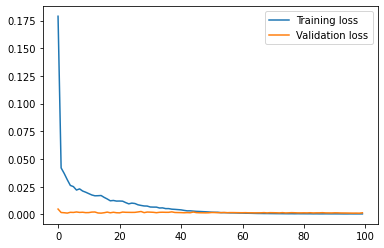

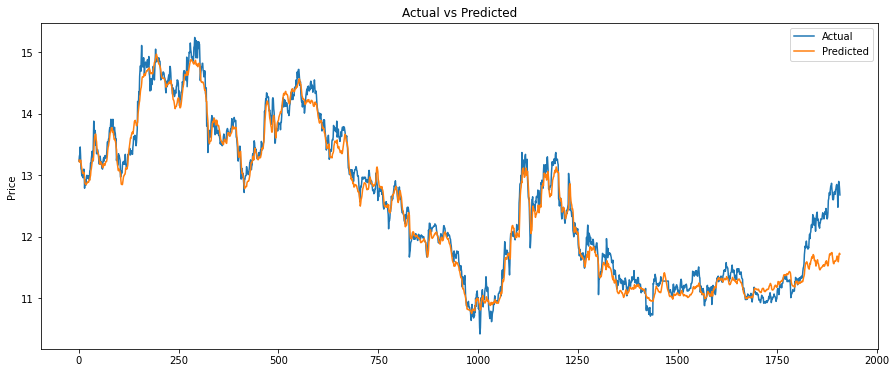

Train Score: 0.23 RMSE, 0.06 MSE, 0.16 MAE
16/16 [==============================] - 0s 3ms/step


Test Score: 0.48 RMSE, 0.23 MSE, 0.42 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1896, 60, 30).
trainY shape == (1896, 1).
testX shape == (490, 60, 30).
testY shape == (490, 1).


(1896, 1)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60, 8)             1248      
                                                                 
 dropout_10 (Dropout)        (None, 60, 8)             0         
                                                                 
 lstm_11 (LSTM)              (None, 8)                 544       
                                                                 
 dropout_11 (Dropout)        (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1801 (7.04 KB)
Trainable params: 1801 (7.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100


INFO:tensorflow:Assets written to: ./models/LSTM_A0_2_8_60/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
60/60 [==============================] - 0s 2ms/step


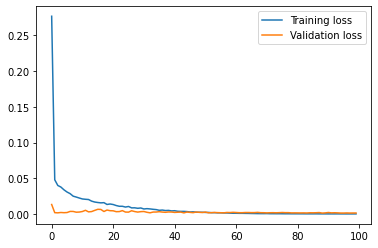

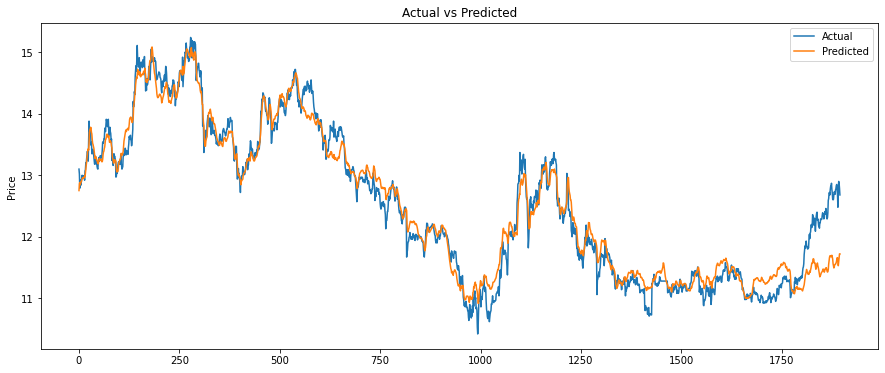

Train Score: 0.28 RMSE, 0.08 MSE, 0.19 MAE
16/16 [==============================] - 0s 3ms/step


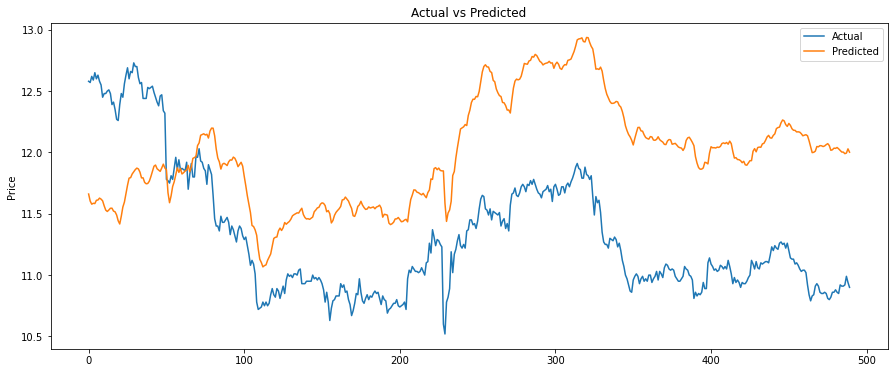

Test Score: 0.88 RMSE, 0.77 MSE, 0.83 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1944, 12, 30).
trainY shape == (1944, 1).
testX shape == (490, 12, 30).
testY shape == (490, 1).


(1944, 1)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 12, 16)            3008      
                                                                 
 dropout_12 (Dropout)        (None, 12, 16)            0         
                                                                 
 lstm_13 (LSTM)              (None, 16)                2112      
                                                                 
 dropout_13 (Dropout)        (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5137 (20.07 KB)
Trainable params: 5137 (20.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10

INFO:tensorflow:Assets written to: ./models/LSTM_A0_2_16_12/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
61/61 [==============================] - 0s 946us/step


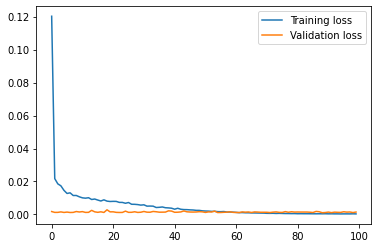

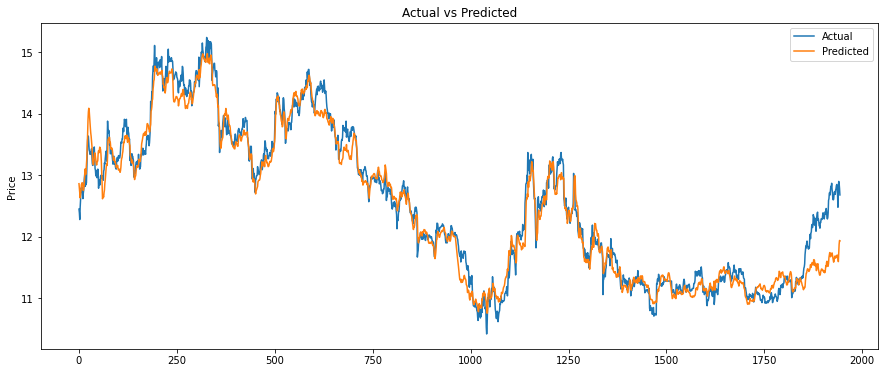

Train Score: 0.26 RMSE, 0.07 MSE, 0.18 MAE
16/16 [==============================] - 0s 1ms/step


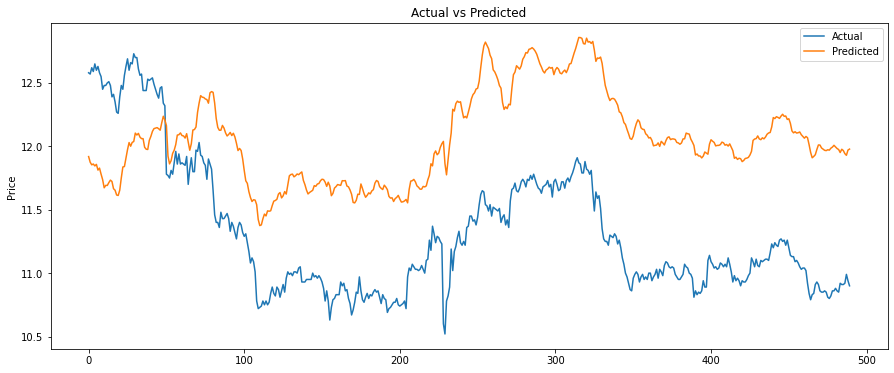

Test Score: 0.89 RMSE, 0.79 MSE, 0.85 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1932, 24, 30).
trainY shape == (1932, 1).
testX shape == (490, 24, 30).
testY shape == (490, 1).


(1932, 1)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 24, 16)            3008      
                                                                 
 dropout_14 (Dropout)        (None, 24, 16)            0         
                                                                 
 lstm_15 (LSTM)              (None, 16)                2112      
                                                                 
 dropout_15 (Dropout)        (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5137 (20.07 KB)
Trainable params: 5137 (20.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10

INFO:tensorflow:Assets written to: ./models/LSTM_A0_2_16_24/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
61/61 [==============================] - 0s 1ms/step


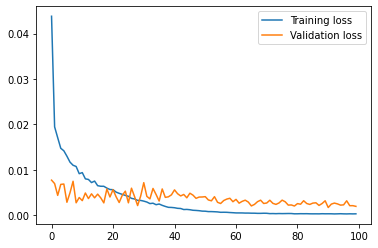

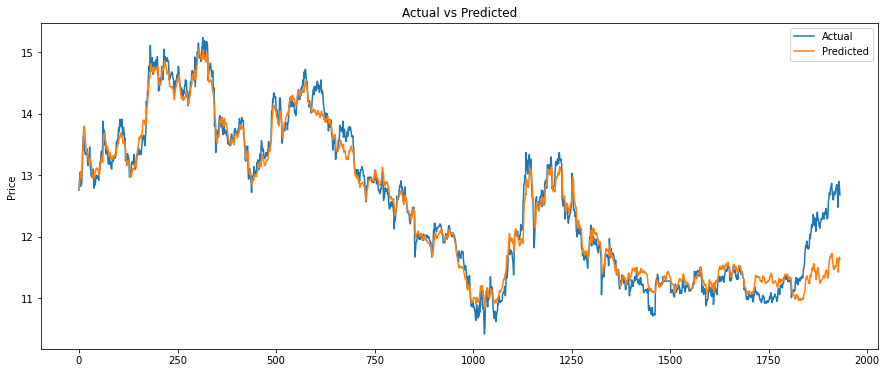

Train Score: 0.26 RMSE, 0.07 MSE, 0.17 MAE
16/16 [==============================] - 0s 2ms/step


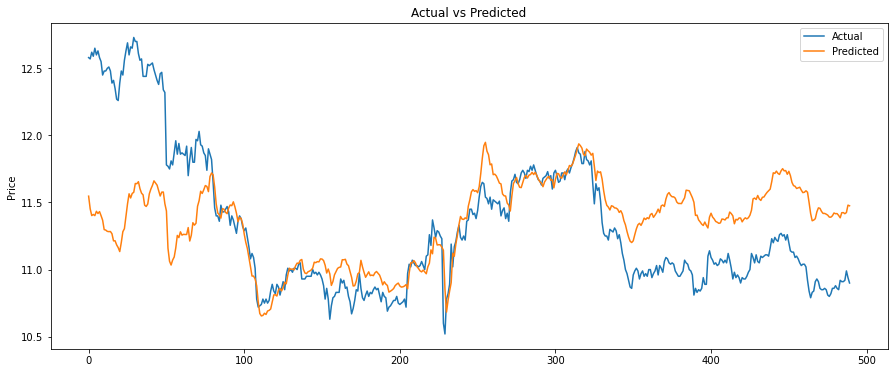

Test Score: 0.46 RMSE, 0.21 MSE, 0.33 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1920, 36, 30).
trainY shape == (1920, 1).
testX shape == (490, 36, 30).
testY shape == (490, 1).


(1920, 1)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 36, 16)            3008      
                                                                 
 dropout_16 (Dropout)        (None, 36, 16)            0         
                                                                 
 lstm_17 (LSTM)              (None, 16)                2112      
                                                                 
 dropout_17 (Dropout)        (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5137 (20.07 KB)
Trainable params: 5137 (20.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10

INFO:tensorflow:Assets written to: ./models/LSTM_A0_2_16_36/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
60/60 [==============================] - 0s 2ms/step


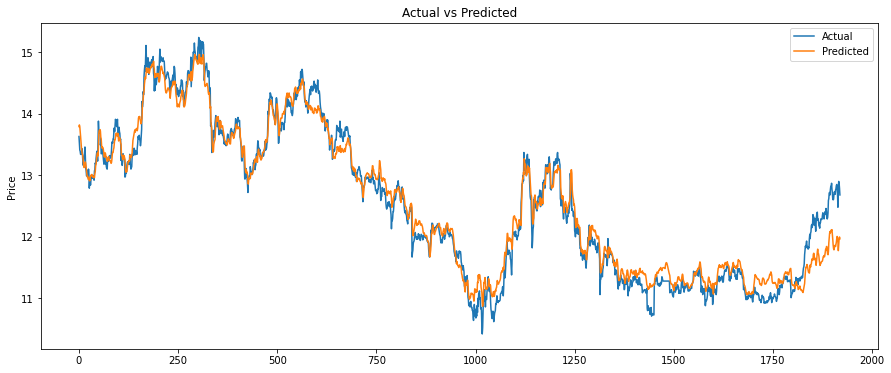

Train Score: 0.23 RMSE, 0.05 MSE, 0.17 MAE
16/16 [==============================] - 0s 2ms/step


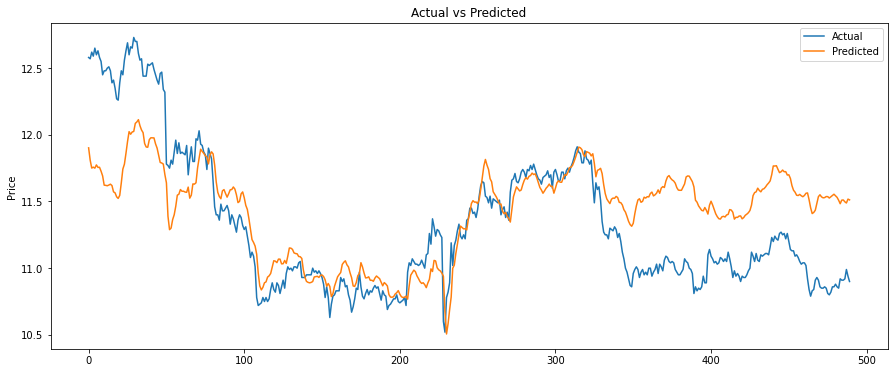

Test Score: 0.39 RMSE, 0.16 MSE, 0.31 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1908, 48, 30).
trainY shape == (1908, 1).
testX shape == (490, 48, 30).
testY shape == (490, 1).


(1908, 1)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 48, 16)            3008      
                                                                 
 dropout_18 (Dropout)        (None, 48, 16)            0         
                                                                 
 lstm_19 (LSTM)              (None, 16)                2112      
                                                                 
 dropout_19 (Dropout)        (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5137 (20.07 KB)
Trainable params: 5137 (20.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10

INFO:tensorflow:Assets written to: ./models/LSTM_A0_2_16_48/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
60/60 [==============================] - 0s 2ms/step


Train Score: 0.22 RMSE, 0.05 MSE, 0.15 MAE
16/16 [==============================] - 0s 3ms/step


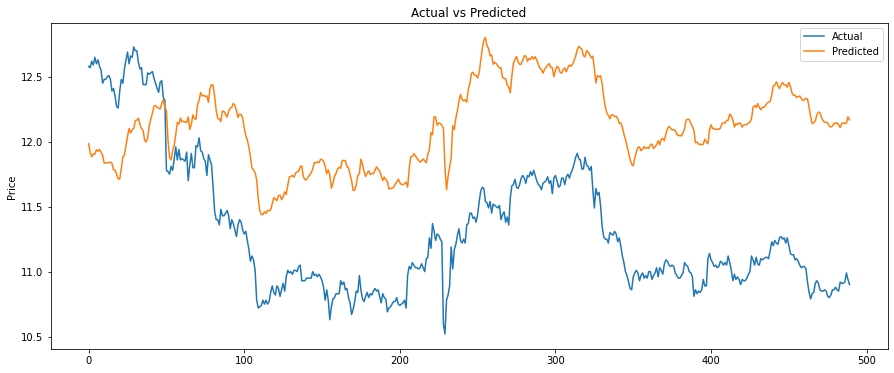

Test Score: 0.93 RMSE, 0.87 MSE, 0.89 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1896, 60, 30).
trainY shape == (1896, 1).
testX shape == (490, 60, 30).
testY shape == (490, 1).


(1896, 1)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 60, 16)            3008      
                                                                 
 dropout_20 (Dropout)        (None, 60, 16)            0         
                                                                 
 lstm_21 (LSTM)              (None, 16)                2112      
                                                                 
 dropout_21 (Dropout)        (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 5137 (20.07 KB)
Trainable params: 5137 (20.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1

INFO:tensorflow:Assets written to: ./models/LSTM_A0_2_16_60/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
60/60 [==============================] - 0s 3ms/step


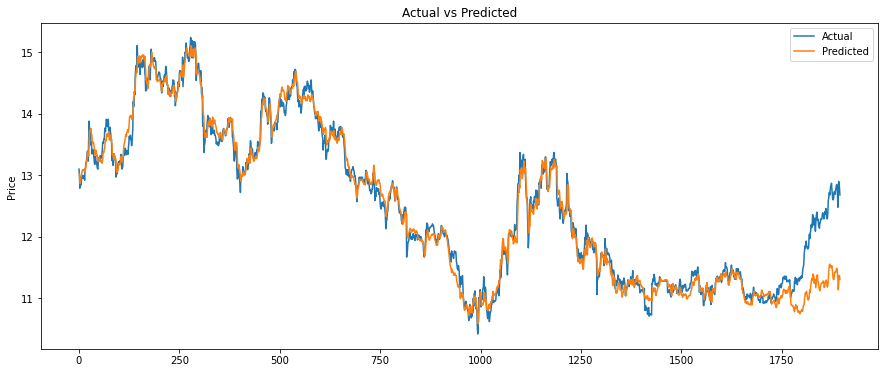

Train Score: 0.28 RMSE, 0.08 MSE, 0.16 MAE
16/16 [==============================] - 0s 3ms/step


Test Score: 0.58 RMSE, 0.34 MSE, 0.43 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1944, 12, 30).
trainY shape == (1944, 1).
testX shape == (490, 12, 30).
testY shape == (490, 1).


(1944, 1)
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 12, 32)            8064      
                                                                 
 dropout_22 (Dropout)        (None, 12, 32)            0         
                                                                 
 lstm_23 (LSTM)              (None, 32)                8320      
                                                                 
 dropout_23 (Dropout)        (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16417 (64.13 KB)
Trainable params: 16417 (64.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1

INFO:tensorflow:Assets written to: ./models/LSTM_A0_2_32_12/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
61/61 [==============================] - 0s 1ms/step


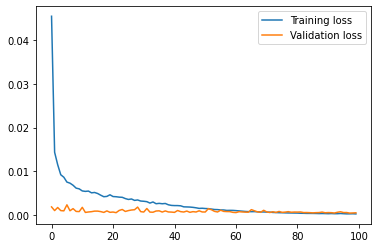

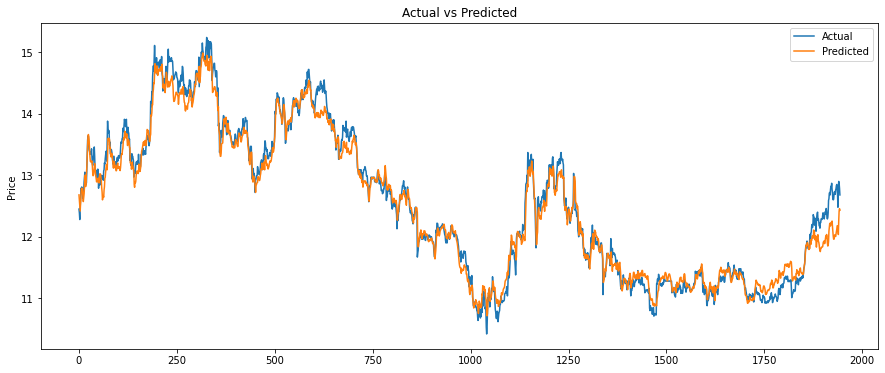

Train Score: 0.19 RMSE, 0.04 MSE, 0.14 MAE
16/16 [==============================] - 0s 1ms/step


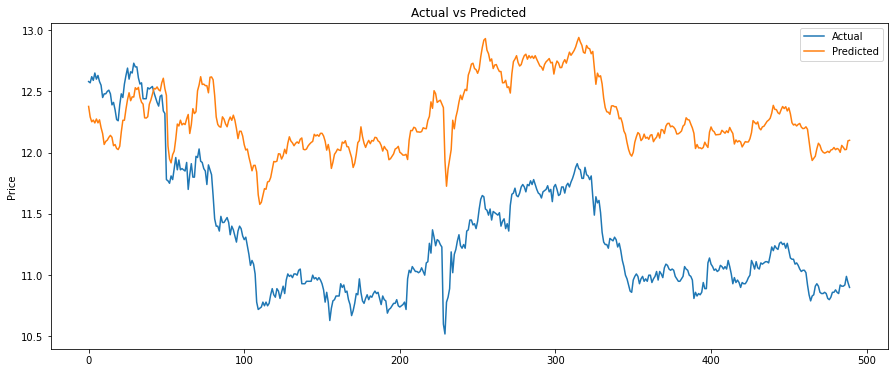

Test Score: 1.04 RMSE, 1.08 MSE, 0.99 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1932, 24, 30).
trainY shape == (1932, 1).
testX shape == (490, 24, 30).
testY shape == (490, 1).


(1932, 1)
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 24, 32)            8064      
                                                                 
 dropout_24 (Dropout)        (None, 24, 32)            0         
                                                                 
 lstm_25 (LSTM)              (None, 32)                8320      
                                                                 
 dropout_25 (Dropout)        (None, 32)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16417 (64.13 KB)
Trainable params: 16417 (64.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1

INFO:tensorflow:Assets written to: ./models/LSTM_A0_2_32_24/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
61/61 [==============================] - 0s 2ms/step


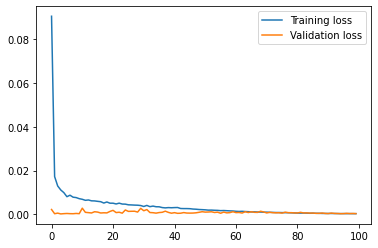

Train Score: 0.17 RMSE, 0.03 MSE, 0.13 MAE
16/16 [==============================] - 0s 2ms/step


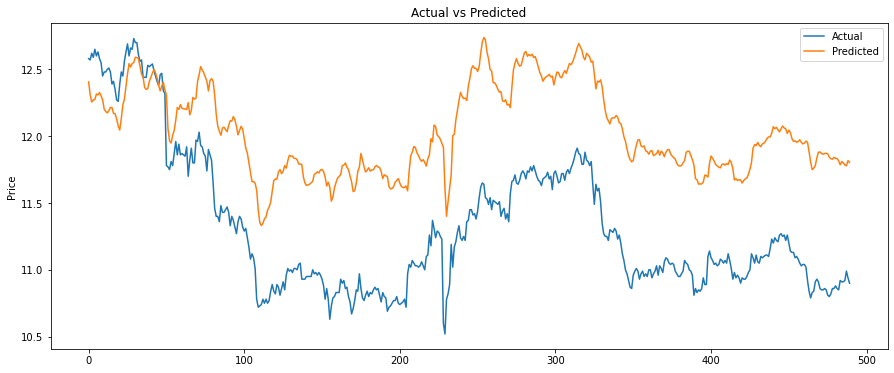

Test Score: 0.78 RMSE, 0.61 MSE, 0.74 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1920, 36, 30).
trainY shape == (1920, 1).
testX shape == (490, 36, 30).
testY shape == (490, 1).


(1920, 1)
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 36, 32)            8064      
                                                                 
 dropout_26 (Dropout)        (None, 36, 32)            0         
                                                                 
 lstm_27 (LSTM)              (None, 32)                8320      
                                                                 
 dropout_27 (Dropout)        (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16417 (64.13 KB)
Trainable params: 16417 (64.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1

INFO:tensorflow:Assets written to: ./models/LSTM_A0_2_32_36/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
60/60 [==============================] - 0s 2ms/step


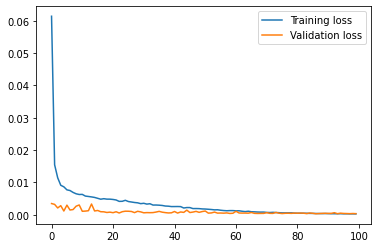

Train Score: 0.17 RMSE, 0.03 MSE, 0.13 MAE
16/16 [==============================] - 0s 3ms/step


Test Score: 1.21 RMSE, 1.46 MSE, 1.12 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1908, 48, 30).
trainY shape == (1908, 1).
testX shape == (490, 48, 30).
testY shape == (490, 1).


(1908, 1)
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 48, 32)            8064      
                                                                 
 dropout_28 (Dropout)        (None, 48, 32)            0         
                                                                 
 lstm_29 (LSTM)              (None, 32)                8320      
                                                                 
 dropout_29 (Dropout)        (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16417 (64.13 KB)
Trainable params: 16417 (64.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1

INFO:tensorflow:Assets written to: ./models/LSTM_A0_2_32_48/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
60/60 [==============================] - 0s 3ms/step


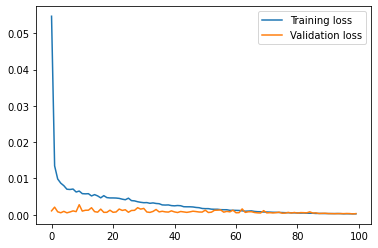

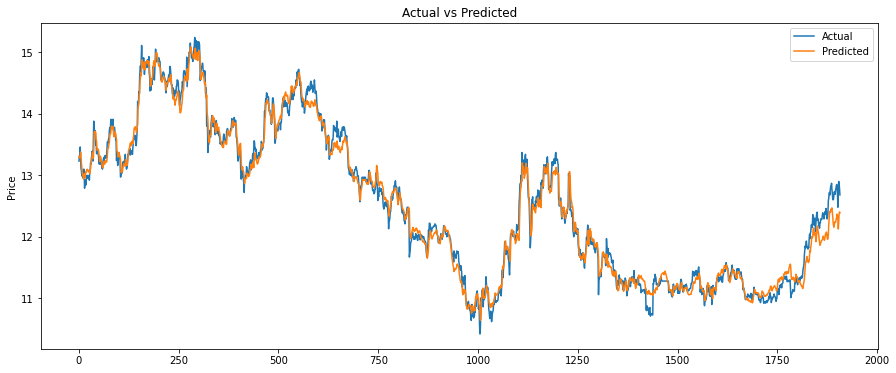

Train Score: 0.15 RMSE, 0.02 MSE, 0.12 MAE
16/16 [==============================] - 0s 3ms/step


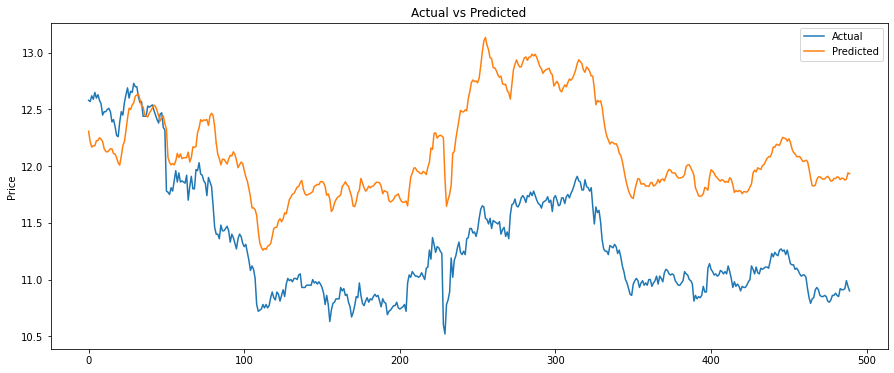

Test Score: 0.89 RMSE, 0.80 MSE, 0.84 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1896, 60, 30).
trainY shape == (1896, 1).
testX shape == (490, 60, 30).
testY shape == (490, 1).


(1896, 1)
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 60, 32)            8064      
                                                                 
 dropout_30 (Dropout)        (None, 60, 32)            0         
                                                                 
 lstm_31 (LSTM)              (None, 32)                8320      
                                                                 
 dropout_31 (Dropout)        (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16417 (64.13 KB)
Trainable params: 16417 (64.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1

INFO:tensorflow:Assets written to: ./models/LSTM_A0_2_32_60/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
60/60 [==============================] - 1s 4ms/step


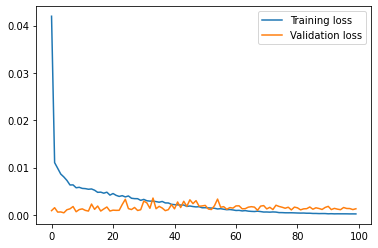

Train Score: 0.22 RMSE, 0.05 MSE, 0.14 MAE
16/16 [==============================] - 0s 7ms/step


Test Score: 0.65 RMSE, 0.42 MSE, 0.61 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1944, 12, 30).
trainY shape == (1944, 1).
testX shape == (490, 12, 30).
testY shape == (490, 1).


(1944, 1)
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 12, 8)             1248      
                                                                 
 dropout_32 (Dropout)        (None, 12, 8)             0         
                                                                 
 lstm_33 (LSTM)              (None, 12, 8)             544       
                                                                 
 dropout_33 (Dropout)        (None, 12, 8)             0         
                                                                 
 lstm_34 (LSTM)              (None, 8)                 544       
                                                                 
 dropout_34 (Dropout)        (None, 8)                 0         
                                                                 
 dense_16 (Dense)            (None, 1)     

INFO:tensorflow:Assets written to: ./models/LSTM_A0_3_8_12/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
61/61 [==============================] - 0s 1ms/step


Train Score: 0.29 RMSE, 0.08 MSE, 0.21 MAE
16/16 [==============================] - 0s 2ms/step


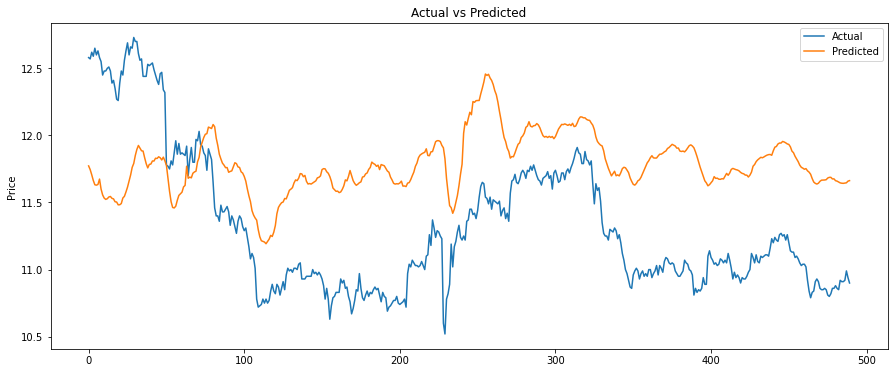

Test Score: 0.69 RMSE, 0.48 MSE, 0.65 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1932, 24, 30).
trainY shape == (1932, 1).
testX shape == (490, 24, 30).
testY shape == (490, 1).


(1932, 1)
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_35 (LSTM)              (None, 24, 8)             1248      
                                                                 
 dropout_35 (Dropout)        (None, 24, 8)             0         
                                                                 
 lstm_36 (LSTM)              (None, 24, 8)             544       
                                                                 
 dropout_36 (Dropout)        (None, 24, 8)             0         
                                                                 
 lstm_37 (LSTM)              (None, 8)                 544       
                                                                 
 dropout_37 (Dropout)        (None, 8)                 0         
                                                                 
 dense_17 (Dense)            (None, 1)     

INFO:tensorflow:Assets written to: ./models/LSTM_A0_3_8_24/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
61/61 [==============================] - 0s 2ms/step


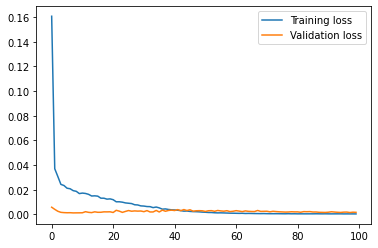

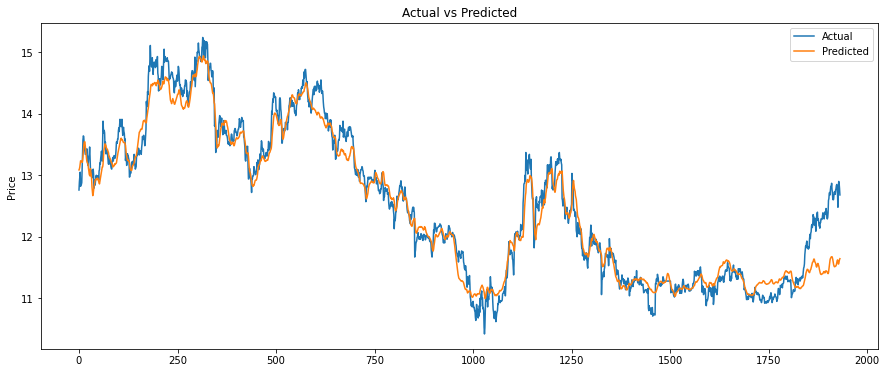

Train Score: 0.28 RMSE, 0.08 MSE, 0.20 MAE
16/16 [==============================] - 0s 5ms/step


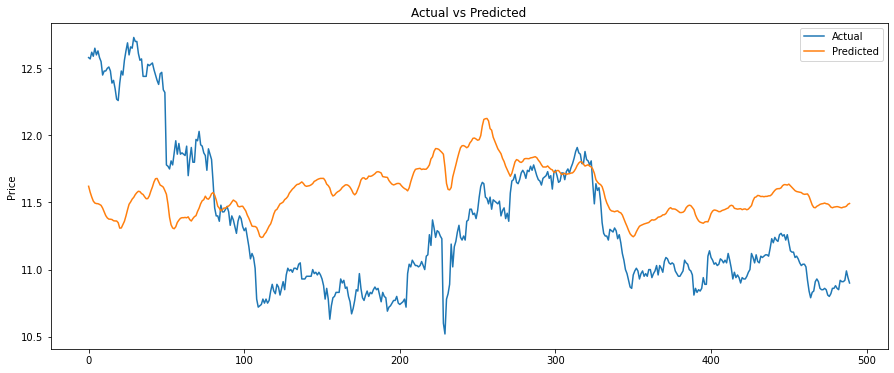

Test Score: 0.59 RMSE, 0.35 MSE, 0.52 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1920, 36, 30).
trainY shape == (1920, 1).
testX shape == (490, 36, 30).
testY shape == (490, 1).


(1920, 1)
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 36, 8)             1248      
                                                                 
 dropout_38 (Dropout)        (None, 36, 8)             0         
                                                                 
 lstm_39 (LSTM)              (None, 36, 8)             544       
                                                                 
 dropout_39 (Dropout)        (None, 36, 8)             0         
                                                                 
 lstm_40 (LSTM)              (None, 8)                 544       
                                                                 
 dropout_40 (Dropout)        (None, 8)                 0         
                                                                 
 dense_18 (Dense)            (None, 1)     

INFO:tensorflow:Assets written to: ./models/LSTM_A0_3_8_36/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
60/60 [==============================] - 0s 2ms/step


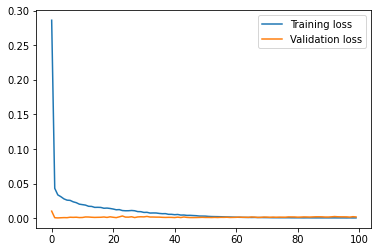

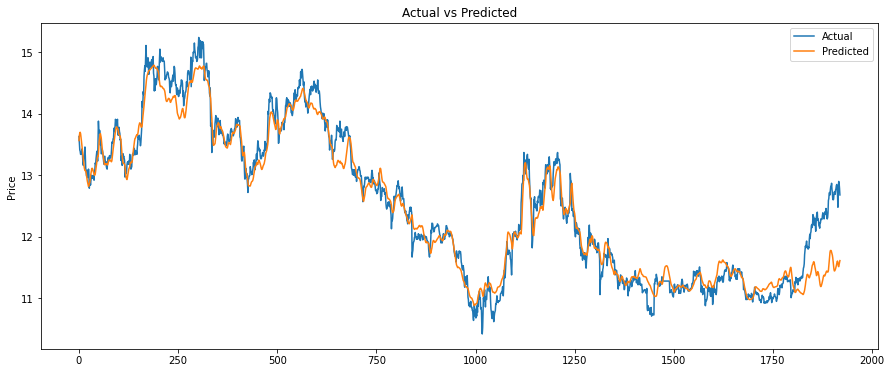

Train Score: 0.29 RMSE, 0.08 MSE, 0.20 MAE
16/16 [==============================] - 0s 2ms/step


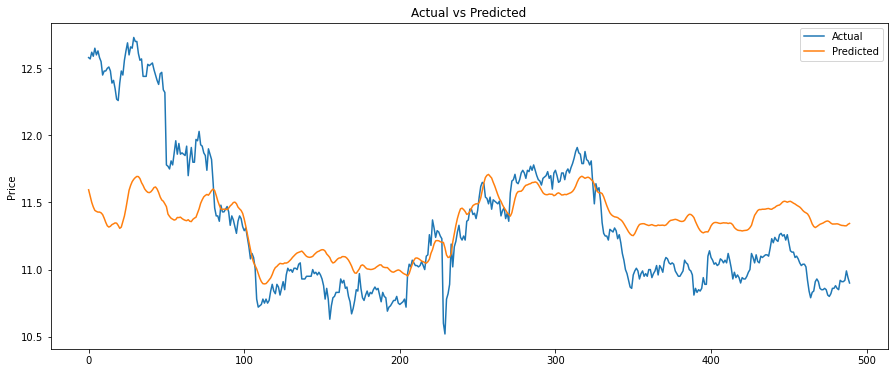

Test Score: 0.42 RMSE, 0.18 MSE, 0.31 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1908, 48, 30).
trainY shape == (1908, 1).
testX shape == (490, 48, 30).
testY shape == (490, 1).


(1908, 1)
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_41 (LSTM)              (None, 48, 8)             1248      
                                                                 
 dropout_41 (Dropout)        (None, 48, 8)             0         
                                                                 
 lstm_42 (LSTM)              (None, 48, 8)             544       
                                                                 
 dropout_42 (Dropout)        (None, 48, 8)             0         
                                                                 
 lstm_43 (LSTM)              (None, 8)                 544       
                                                                 
 dropout_43 (Dropout)        (None, 8)                 0         
                                                                 
 dense_19 (Dense)            (None, 1)     

INFO:tensorflow:Assets written to: ./models/LSTM_A0_3_8_48/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
60/60 [==============================] - 1s 3ms/step


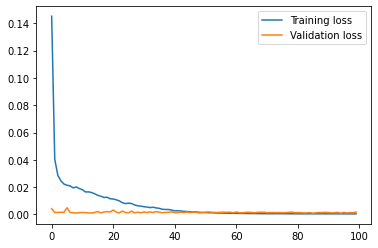

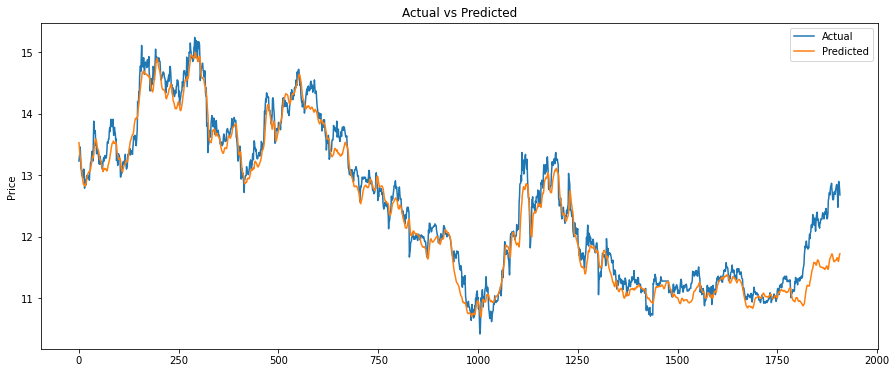

Train Score: 0.27 RMSE, 0.07 MSE, 0.19 MAE
16/16 [==============================] - 0s 5ms/step


Test Score: 0.78 RMSE, 0.61 MSE, 0.72 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1896, 60, 30).
trainY shape == (1896, 1).
testX shape == (490, 60, 30).
testY shape == (490, 1).


(1896, 1)
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 60, 8)             1248      
                                                                 
 dropout_44 (Dropout)        (None, 60, 8)             0         
                                                                 
 lstm_45 (LSTM)              (None, 60, 8)             544       
                                                                 
 dropout_45 (Dropout)        (None, 60, 8)             0         
                                                                 
 lstm_46 (LSTM)              (None, 8)                 544       
                                                                 
 dropout_46 (Dropout)        (None, 8)                 0         
                                                                 
 dense_20 (Dense)            (None, 1)     

INFO:tensorflow:Assets written to: ./models/LSTM_A0_3_8_60/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
60/60 [==============================] - 1s 3ms/step


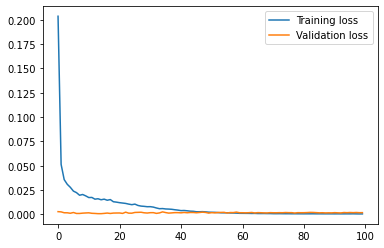

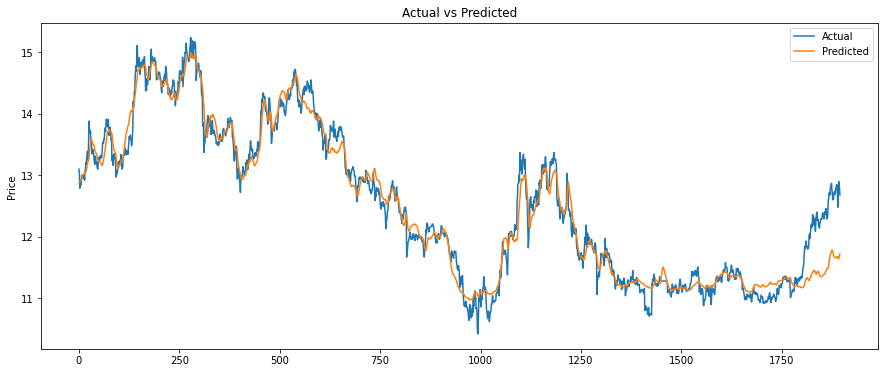

Train Score: 0.27 RMSE, 0.07 MSE, 0.18 MAE
16/16 [==============================] - 0s 4ms/step


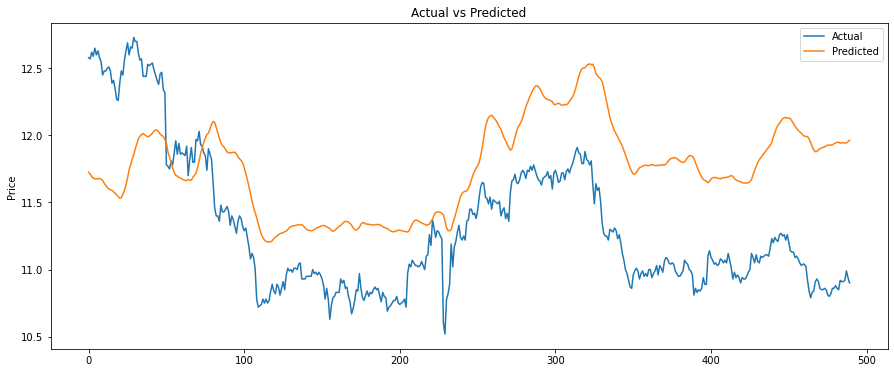

Test Score: 0.65 RMSE, 0.42 MSE, 0.59 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1944, 12, 30).
trainY shape == (1944, 1).
testX shape == (490, 12, 30).
testY shape == (490, 1).


(1944, 1)
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_47 (LSTM)              (None, 12, 16)            3008      
                                                                 
 dropout_47 (Dropout)        (None, 12, 16)            0         
                                                                 
 lstm_48 (LSTM)              (None, 12, 16)            2112      
                                                                 
 dropout_48 (Dropout)        (None, 12, 16)            0         
                                                                 
 lstm_49 (LSTM)              (None, 16)                2112      
                                                                 
 dropout_49 (Dropout)        (None, 16)                0         
                                                                 
 dense_21 (Dense)            (None, 1)     

INFO:tensorflow:Assets written to: ./models/LSTM_A0_3_16_12/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
61/61 [==============================] - 0s 1ms/step


Train Score: 0.21 RMSE, 0.05 MSE, 0.16 MAE
16/16 [==============================] - 0s 2ms/step


Test Score: 1.22 RMSE, 1.49 MSE, 1.11 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1932, 24, 30).
trainY shape == (1932, 1).
testX shape == (490, 24, 30).
testY shape == (490, 1).


(1932, 1)
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_50 (LSTM)              (None, 24, 16)            3008      
                                                                 
 dropout_50 (Dropout)        (None, 24, 16)            0         
                                                                 
 lstm_51 (LSTM)              (None, 24, 16)            2112      
                                                                 
 dropout_51 (Dropout)        (None, 24, 16)            0         
                                                                 
 lstm_52 (LSTM)              (None, 16)                2112      
                                                                 
 dropout_52 (Dropout)        (None, 16)                0         
                                                                 
 dense_22 (Dense)            (None, 1)     

INFO:tensorflow:Assets written to: ./models/LSTM_A0_3_16_24/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
61/61 [==============================] - 0s 2ms/step


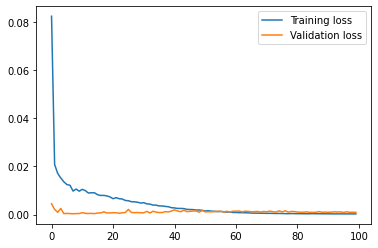

Train Score: 0.22 RMSE, 0.05 MSE, 0.16 MAE
16/16 [==============================] - 0s 4ms/step


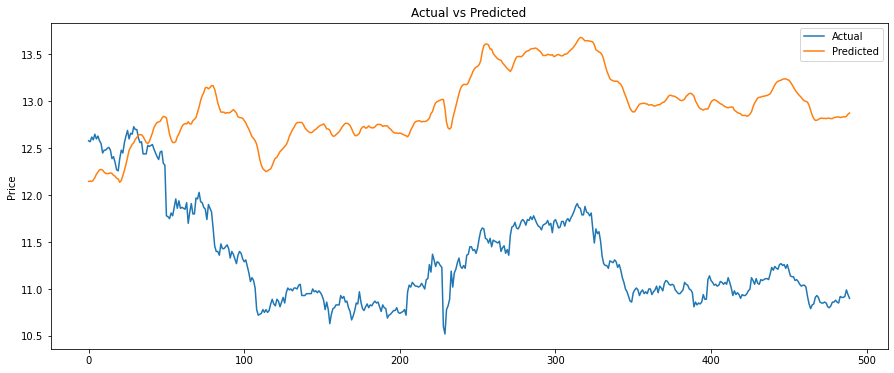

Test Score: 1.73 RMSE, 2.99 MSE, 1.64 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1920, 36, 30).
trainY shape == (1920, 1).
testX shape == (490, 36, 30).
testY shape == (490, 1).


(1920, 1)
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_53 (LSTM)              (None, 36, 16)            3008      
                                                                 
 dropout_53 (Dropout)        (None, 36, 16)            0         
                                                                 
 lstm_54 (LSTM)              (None, 36, 16)            2112      
                                                                 
 dropout_54 (Dropout)        (None, 36, 16)            0         
                                                                 
 lstm_55 (LSTM)              (None, 16)                2112      
                                                                 
 dropout_55 (Dropout)        (None, 16)                0         
                                                                 
 dense_23 (Dense)            (None, 1)     

INFO:tensorflow:Assets written to: ./models/LSTM_A0_3_16_36/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
60/60 [==============================] - 1s 3ms/step


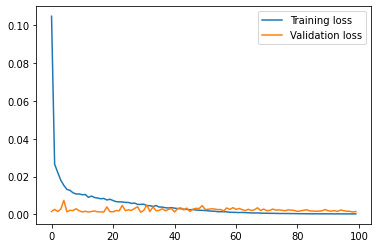

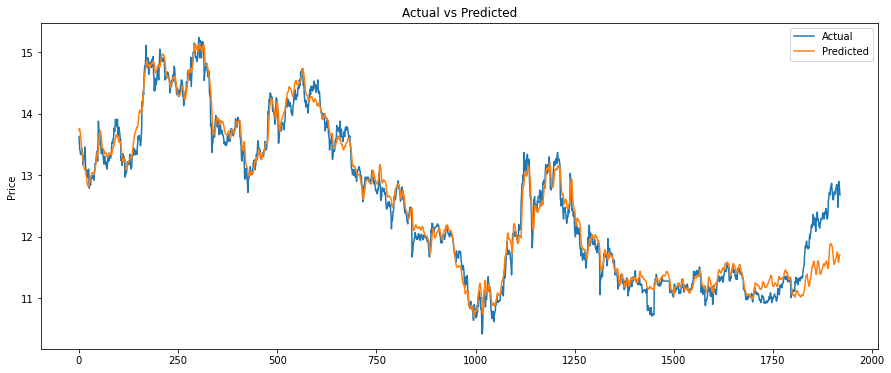

Train Score: 0.25 RMSE, 0.06 MSE, 0.16 MAE
16/16 [==============================] - 0s 3ms/step


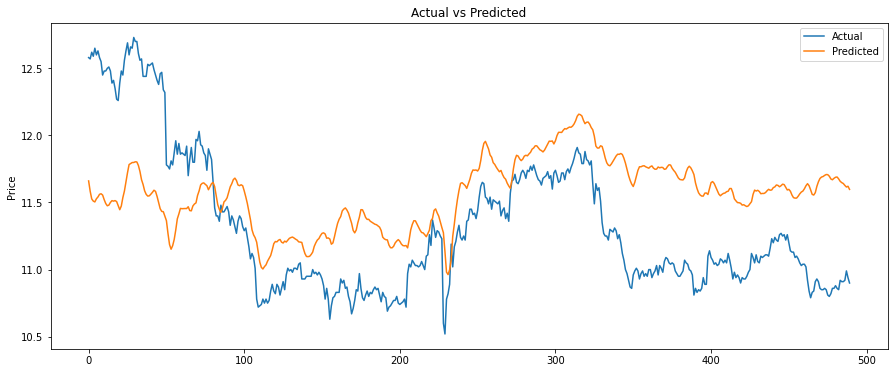

Test Score: 0.54 RMSE, 0.29 MSE, 0.48 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1908, 48, 30).
trainY shape == (1908, 1).
testX shape == (490, 48, 30).
testY shape == (490, 1).


(1908, 1)
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_56 (LSTM)              (None, 48, 16)            3008      
                                                                 
 dropout_56 (Dropout)        (None, 48, 16)            0         
                                                                 
 lstm_57 (LSTM)              (None, 48, 16)            2112      
                                                                 
 dropout_57 (Dropout)        (None, 48, 16)            0         
                                                                 
 lstm_58 (LSTM)              (None, 16)                2112      
                                                                 
 dropout_58 (Dropout)        (None, 16)                0         
                                                                 
 dense_24 (Dense)            (None, 1)     

INFO:tensorflow:Assets written to: ./models/LSTM_A0_3_16_48/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
60/60 [==============================] - 1s 3ms/step


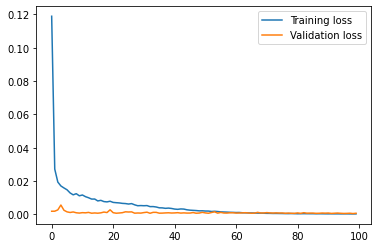

Train Score: 0.20 RMSE, 0.04 MSE, 0.15 MAE
16/16 [==============================] - 0s 5ms/step


Test Score: 1.40 RMSE, 1.97 MSE, 1.30 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1896, 60, 30).
trainY shape == (1896, 1).
testX shape == (490, 60, 30).
testY shape == (490, 1).


(1896, 1)
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_59 (LSTM)              (None, 60, 16)            3008      
                                                                 
 dropout_59 (Dropout)        (None, 60, 16)            0         
                                                                 
 lstm_60 (LSTM)              (None, 60, 16)            2112      
                                                                 
 dropout_60 (Dropout)        (None, 60, 16)            0         
                                                                 
 lstm_61 (LSTM)              (None, 16)                2112      
                                                                 
 dropout_61 (Dropout)        (None, 16)                0         
                                                                 
 dense_25 (Dense)            (None, 1)     

INFO:tensorflow:Assets written to: ./models/LSTM_A0_3_16_60/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
60/60 [==============================] - 1s 4ms/step


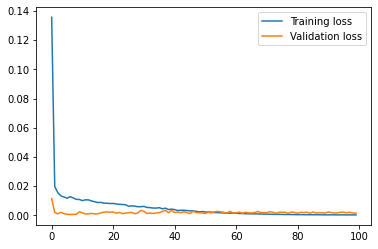

Train Score: 0.24 RMSE, 0.06 MSE, 0.16 MAE
16/16 [==============================] - 0s 6ms/step


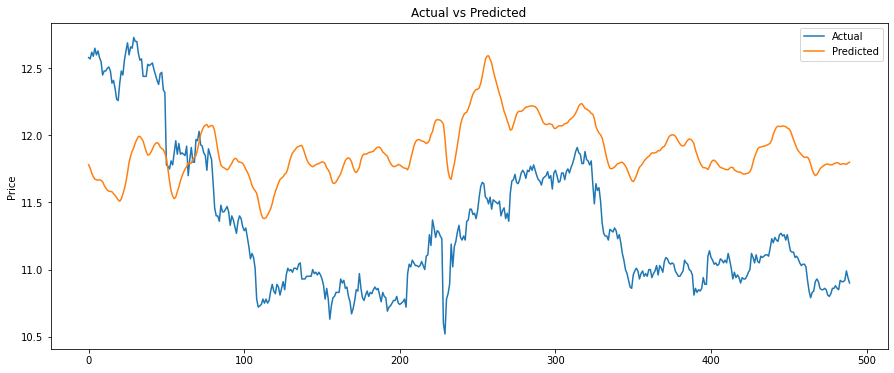

Test Score: 0.77 RMSE, 0.59 MSE, 0.72 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1944, 12, 30).
trainY shape == (1944, 1).
testX shape == (490, 12, 30).
testY shape == (490, 1).


(1944, 1)
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_62 (LSTM)              (None, 12, 32)            8064      
                                                                 
 dropout_62 (Dropout)        (None, 12, 32)            0         
                                                                 
 lstm_63 (LSTM)              (None, 12, 32)            8320      
                                                                 
 dropout_63 (Dropout)        (None, 12, 32)            0         
                                                                 
 lstm_64 (LSTM)              (None, 32)                8320      
                                                                 
 dropout_64 (Dropout)        (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 1)     

INFO:tensorflow:Assets written to: ./models/LSTM_A0_3_32_12/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
61/61 [==============================] - 0s 1ms/step


Train Score: 0.18 RMSE, 0.03 MSE, 0.14 MAE
16/16 [==============================] - 0s 2ms/step


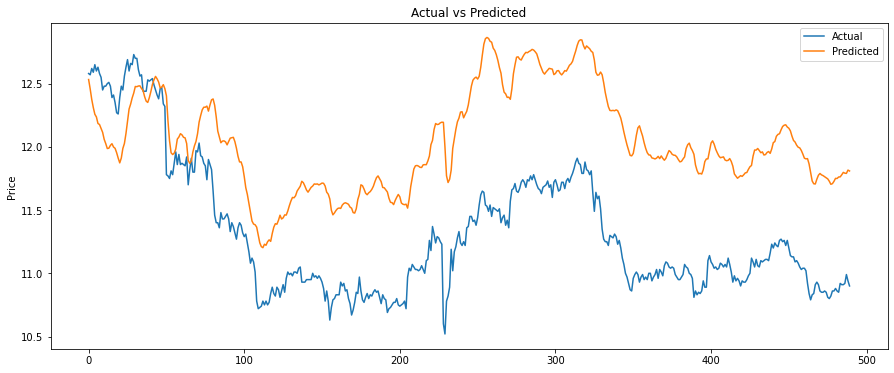

Test Score: 0.82 RMSE, 0.67 MSE, 0.77 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1932, 24, 30).
trainY shape == (1932, 1).
testX shape == (490, 24, 30).
testY shape == (490, 1).


(1932, 1)
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_65 (LSTM)              (None, 24, 32)            8064      
                                                                 
 dropout_65 (Dropout)        (None, 24, 32)            0         
                                                                 
 lstm_66 (LSTM)              (None, 24, 32)            8320      
                                                                 
 dropout_66 (Dropout)        (None, 24, 32)            0         
                                                                 
 lstm_67 (LSTM)              (None, 32)                8320      
                                                                 
 dropout_67 (Dropout)        (None, 32)                0         
                                                                 
 dense_27 (Dense)            (None, 1)     

INFO:tensorflow:Assets written to: ./models/LSTM_A0_3_32_24/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
61/61 [==============================] - 1s 2ms/step


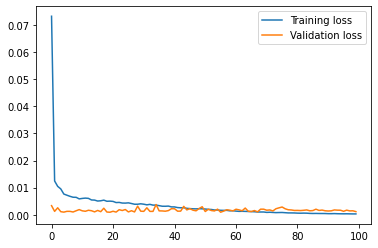

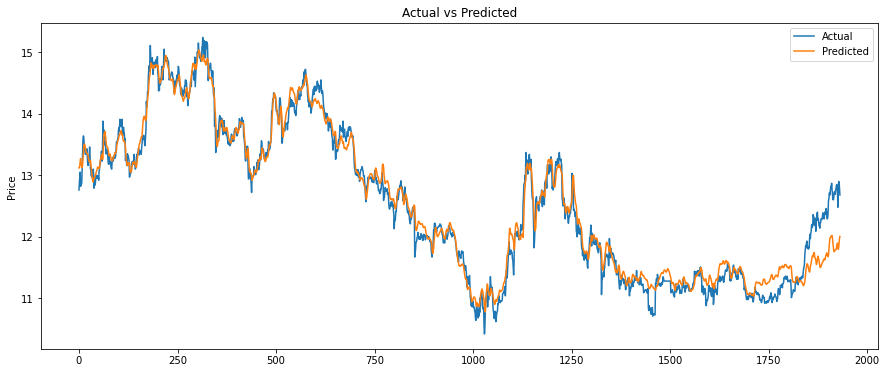

Train Score: 0.22 RMSE, 0.05 MSE, 0.16 MAE
16/16 [==============================] - 0s 4ms/step


Test Score: 0.89 RMSE, 0.80 MSE, 0.85 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1920, 36, 30).
trainY shape == (1920, 1).
testX shape == (490, 36, 30).
testY shape == (490, 1).


(1920, 1)
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_68 (LSTM)              (None, 36, 32)            8064      
                                                                 
 dropout_68 (Dropout)        (None, 36, 32)            0         
                                                                 
 lstm_69 (LSTM)              (None, 36, 32)            8320      
                                                                 
 dropout_69 (Dropout)        (None, 36, 32)            0         
                                                                 
 lstm_70 (LSTM)              (None, 32)                8320      
                                                                 
 dropout_70 (Dropout)        (None, 32)                0         
                                                                 
 dense_28 (Dense)            (None, 1)     

INFO:tensorflow:Assets written to: ./models/LSTM_A0_3_32_36/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
60/60 [==============================] - 1s 3ms/step


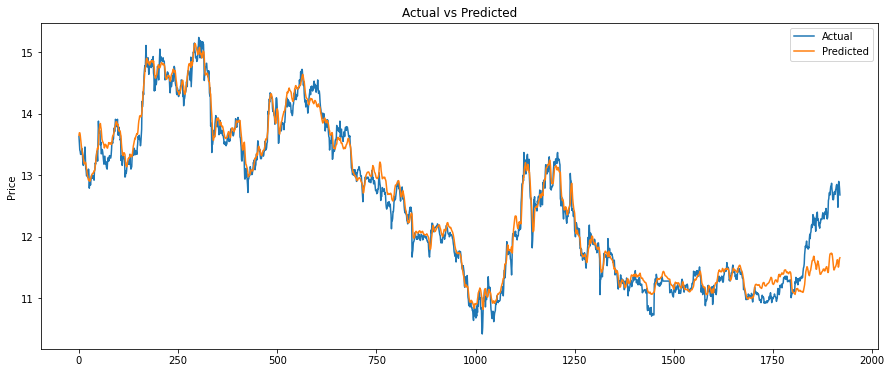

Train Score: 0.24 RMSE, 0.06 MSE, 0.16 MAE
16/16 [==============================] - 0s 4ms/step


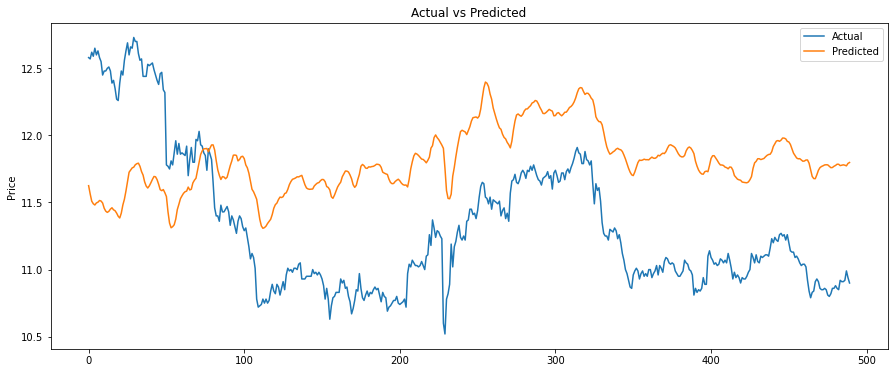

Test Score: 0.73 RMSE, 0.54 MSE, 0.70 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1908, 48, 30).
trainY shape == (1908, 1).
testX shape == (490, 48, 30).
testY shape == (490, 1).


(1908, 1)
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_71 (LSTM)              (None, 48, 32)            8064      
                                                                 
 dropout_71 (Dropout)        (None, 48, 32)            0         
                                                                 
 lstm_72 (LSTM)              (None, 48, 32)            8320      
                                                                 
 dropout_72 (Dropout)        (None, 48, 32)            0         
                                                                 
 lstm_73 (LSTM)              (None, 32)                8320      
                                                                 
 dropout_73 (Dropout)        (None, 32)                0         
                                                                 
 dense_29 (Dense)            (None, 1)     

INFO:tensorflow:Assets written to: ./models/LSTM_A0_3_32_48/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
60/60 [==============================] - 1s 4ms/step


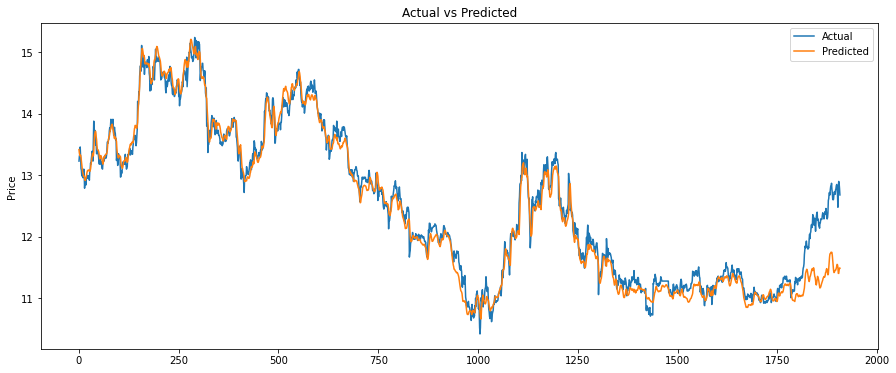

Train Score: 0.26 RMSE, 0.07 MSE, 0.16 MAE
16/16 [==============================] - 0s 5ms/step


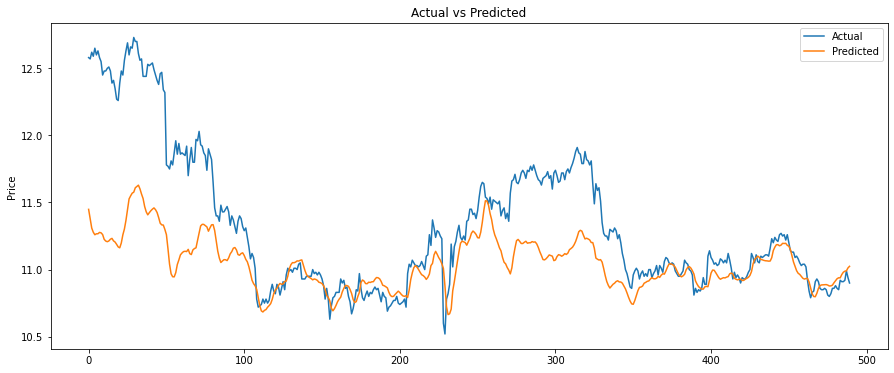

Test Score: 0.47 RMSE, 0.22 MSE, 0.31 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1896, 60, 30).
trainY shape == (1896, 1).
testX shape == (490, 60, 30).
testY shape == (490, 1).


(1896, 1)
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_74 (LSTM)              (None, 60, 32)            8064      
                                                                 
 dropout_74 (Dropout)        (None, 60, 32)            0         
                                                                 
 lstm_75 (LSTM)              (None, 60, 32)            8320      
                                                                 
 dropout_75 (Dropout)        (None, 60, 32)            0         
                                                                 
 lstm_76 (LSTM)              (None, 32)                8320      
                                                                 
 dropout_76 (Dropout)        (None, 32)                0         
                                                                 
 dense_30 (Dense)            (None, 1)     

INFO:tensorflow:Assets written to: ./models/LSTM_A0_3_32_60/assets


[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
60/60 [==============================] - 1s 5ms/step


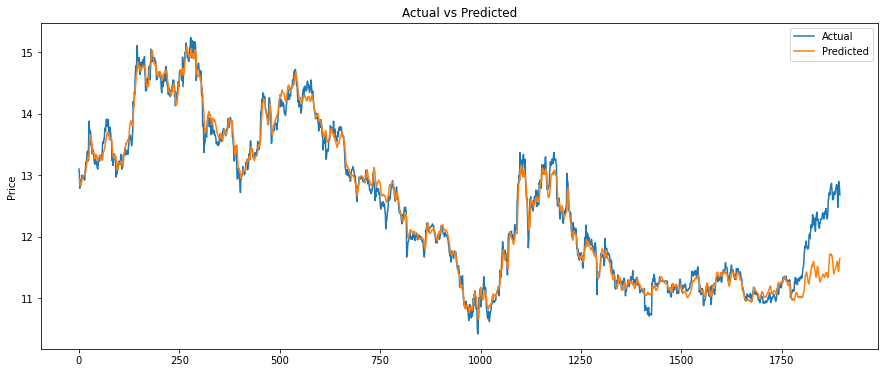

Train Score: 0.25 RMSE, 0.06 MSE, 0.14 MAE
16/16 [==============================] - 0s 7ms/step


Test Score: 0.65 RMSE, 0.43 MSE, 0.62 MAE
(2446, 110)
(2446, 110)
(2446, 110)
[  0   1   2   4   5   6   7   8   9  10  12  13  23  24  33  36  39  41
  42  44  45  46  66  67  68  75  91  92 105 107]
(2446, 30)
trainX shape == (1944, 12, 30).
trainY shape == (1944, 1).
testX shape == (490, 12, 30).
testY shape == (490, 1).


(1944, 1)
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_77 (LSTM)              (None, 12, 8)             1248      
                                                                 
 dropout_77 (Dropout)        (None, 12, 8)             0         
                                                                 
 lstm_78 (LSTM)              (None, 8)                 544       
                                                                 
 dropout_78 (Dropout)        (None, 8)                 0         
                                                                 
 dense_31 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1801 (7.04 KB)
Trainable params: 1801 (7.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100

KeyboardInterrupt: 

In [16]:
alphas = [0.01, 0.001, 0.00001]
# 0.01, 0.0001은 처음에 이미 한 번 함.
# LSTM은 0.01함. 
layers = [2, 3]
neurons = [8, 16, 32]
look_back = [12, 24, 36, 48, 60]

# Assuming you have a correct size for your matrix based on your parameters
n_rows = len(alphas) * len(layers) * len(neurons) * len(look_back)
matrix = np.zeros((n_rows, 4), dtype=np.int32)

index = 0
for alpha in alphas:
    for layer in layers:
        for neuron in neurons:
            for lb in look_back:
                # Ensure we don't exceed the size of the matrix
                if index < n_rows:
                    matrix[index] = [alpha, layer, neuron, lb]
                    index += 1
                else:
                    print(f'Exceeded matrix size at index {index}')

csv_file = 'result.csv'
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Model Name', 'Train RMSE', 'Train MSE', 'Train MAE', 'Test RMSE', 'Test MSE', 'Test MAE'])
    
    # Extracting variables using a triple nested loop
    for i in range(matrix.shape[0]):
        alpha_val = matrix[i][0]
        layer_val = matrix[i][1]
        neuron_val = matrix[i][2]
        look_back_val = matrix[i][3]
        
        
        model_name = f"./models/LSTM_A0_{layer_val}_{neuron_val}_{look_back_val}"
        
        # price col 위치 재조정.
        cols = list(cosmos_df.columns)
        cols.insert(1, cols.pop(cols.index('price')))
        # Reindex the DataFrame
        cosmos_df = cosmos_df.loc[:, cols]

        cols = list(cosmos_df)[1:cosmos_df.shape[1]]
        df_for_training = cosmos_df[cols].astype(float)
        print(df_for_training.shape)

        scaler = MaxAbsScaler()
        scaler.fit(df_for_training)
        df_for_training_scaled = scaler.transform(df_for_training)
        print(df_for_training_scaled.shape)

        # Lasso Regression for feature selection
        lasso = Lasso(alpha)
        # Assume 'price' is the first column after reindexing and the target to predict
        lasso.fit(df_for_training_scaled[:, 1:], df_for_training_scaled[:, 0])

        print(df_for_training_scaled.shape)
        # (2446, 110)

        # Use Lasso for feature selection
        selected_features = np.where(lasso.coef_!=0)[0]
        print(selected_features)

        # Update your train data according to selected features
        df_for_training_scaled_selected = df_for_training_scaled[:, selected_features]
        print(df_for_training_scaled_selected.shape)
        
        trainX = []
        trainY = []

        n_future = 1 
        n_past = look_back_val

        # define the point to split the data into training and testing
        split_point = int(df_for_training_scaled_selected.shape[0]*0.8) 

        # construct training part
        for i in range(n_past, split_point):
            trainX.append(df_for_training_scaled_selected[i - n_past:i, 0:df_for_training_scaled_selected.shape[1]])
            trainY.append(df_for_training_scaled_selected[i + n_future - 1:i + n_future, 0])

        trainX, trainY = np.array(trainX), np.array(trainY)

        print('trainX shape == {}.'.format(trainX.shape))
        print('trainY shape == {}.'.format(trainY.shape))

        # construct testing part
        testX = []
        testY = []

        for i in range(split_point, len(df_for_training_scaled_selected) - n_future +1):
            testX.append(df_for_training_scaled_selected[i - n_past:i, 0:df_for_training_scaled_selected.shape[1]])
            testY.append(df_for_training_scaled_selected[i + n_future - 1:i + n_future, 0])

        testX, testY = np.array(testX), np.array(testY)

        print('testX shape == {}.'.format(testX.shape))
        print('testY shape == {}.'.format(testY.shape))
        
        model = Sequential()
        if(layer_val == 2):
            model.add(LSTM(neuron_val, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
            model.add(Dropout(0.2))
            model.add(LSTM(neuron_val, activation='tanh', return_sequences=False))
            model.add(Dropout(0.2))
            model.add(Dense(trainY.shape[1]))
            print(trainY.shape)
        elif(layer_val == 3):
            model.add(LSTM(neuron_val, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
            model.add(Dropout(0.2))
            model.add(LSTM(neuron_val, activation='tanh', return_sequences=True))
            model.add(Dropout(0.2))
            model.add(LSTM(neuron_val, activation='tanh', return_sequences=False))
            model.add(Dropout(0.2))
            model.add(Dense(trainY.shape[1]))
            print(trainY.shape)

        optimizer = Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss='mse')
        model.summary()

        # fit the model
        history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

        plt.plot(history.history['loss'], label='Training loss')
        plt.plot(history.history['val_loss'], label='Validation loss')
        plt.legend()

        # save the model to disk
        model.save(model_name)
        
        # load the model from disk
        model = load_model(model_name)

        # Fit a new scaler to the selected features only
        scaler_selected = MaxAbsScaler()
        print(selected_features)
        scaler_selected.fit(df_for_training.iloc[:, np.concatenate(([0], selected_features + 1))])

        def evaluate_model(model, X, y_true, scaler, selected_features, filename):
            # Predict
            y_pred = model.predict(X)

            # Create dummy arrays for inverse transform
            dummy_pred = np.zeros((len(y_pred), len(selected_features) + 1))
            dummy_true = np.zeros((len(y_true), len(selected_features) + 1))
            
            # Replace the first column with predicted and actual values
            dummy_pred[:,0] = y_pred[:,0]
            dummy_true[:,0] = y_true[:,0]
            
            # Inverse transform
            y_pred_rescaled = scaler.inverse_transform(dummy_pred)[:,0]
            y_true_rescaled = scaler.inverse_transform(dummy_true)[:,0]
            
            rmse = sqrt(mean_squared_error(y_true_rescaled, y_pred_rescaled))
            mse = mean_squared_error(y_true_rescaled, y_pred_rescaled)
            mae = mean_absolute_error(y_true_rescaled, y_pred_rescaled)
            
            # Plot actual vs predicted values
            plt.figure(figsize=(15, 6))
            plt.plot(y_true_rescaled, label='Actual')
            plt.plot(y_pred_rescaled, label='Predicted')
            plt.title('Actual vs Predicted')
            plt.ylabel('Price')
            plt.legend()
            plt.savefig(filename)
            plt.show()
            
            return rmse, mse, mae

        trainAsset = f"./results/train/LSTM_A0_{layer_val}_{neuron_val}_{look_back_val}_train.png"
        testAsset = f"./results/test/LSTM_A0_{layer_val}_{neuron_val}_{look_back_val}_test.png"

        # Call the function for training data
        train_rmse, train_mse, train_mae = evaluate_model(model, trainX, trainY, scaler_selected, selected_features, trainAsset)
        print('Train Score: %.2f RMSE, %.2f MSE, %.2f MAE' % (train_rmse, train_mse, train_mae))

        # Call the function for testing data
        test_rmse, test_mse, test_mae = evaluate_model(model, testX, testY, scaler_selected, selected_features, testAsset)
        print('Test Score: %.2f RMSE, %.2f MSE, %.2f MAE' % (test_rmse, test_mse, test_mae))
        
        writer.writerow([model_name, train_rmse, train_mse, train_mae, test_rmse, test_mse, test_mae])

print(f"Results saved to {csv_file}.")
